In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15  # 固定字体大小
plt.rcParams['font.sans-serif']=['SimSun'] # 用来正常显示中文标签，使用宋体
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

## 创建一个神经网络

### Dataset
数据集使用的是 MNIST Fashion Dataset（MNIST时装数据集），这个数据集包含在 keras 中.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # 载入
(train, train_y), (test, test_y) = fashion_mnist.load_data()  # 分解为训练数据和测试数据

这个数据集中包含 $60000$ 个训练样本，$10000$ 个测试样本，每一个样本都是有 $28\times 28$ 像素的图片构成的，所以总共有 $784$ 个像素. 每一个像素的数据范围为 $0\sim255$（即 `uint8` 数据类型，解释为unsigned integer $2^8$，无符号整型数据范围为：$0\sim2^8$），表示该图片的灰度值（$0$ 表示黑色，$255$ 表示白色）.

In [3]:
print(train.shape)
print(test.shape)
print('像素范围：{} ~ {}'.format(np.min(train), np.max(train)))

(60000, 28, 28)
(10000, 28, 28)
像素范围：0 ~ 255


样本的label是由 $0\sim 9$ 整数构成，分别表示 $10$ 中不同类型的衣服.

In [4]:
# 查看样本的label
print('label范围：{} ~ {}'.format(np.min(train_y), np.max(train_y)))
#classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes = ['T恤/上衣', '裤子', '套头衫', '连衣裙', '大衣',
           '凉鞋', '衬衫', '运动鞋', '手袋', '踝靴']  # 10中衣服的类型

label范围：0 ~ 9


可以用 matplotlib 显示具体图像

凉鞋


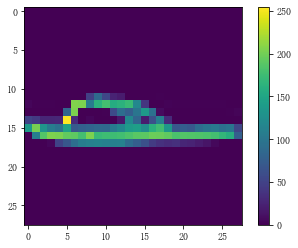

In [5]:
n = 30
print(classes[train_y[n]])
plt.imshow(train[n])
plt.colorbar()
plt.show()

### 数据处理
将输入的特征转化为 $[0, 1]$ 之间的小数，因为神经网络随机的初始参数，weight和bias，都是在 $[0,1]$ 之间的，这样训练效率更高.

In [6]:
train = train / 255
test = test / 255

### 创建模型

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # input layer
    keras.layers.Dense(128, activation='relu'),    # hidden layer
    keras.layers.Dense(10, activation='softmax')  # output layer
])

### 编译模型（配置超参数）
设置 `optimizer, loss, metrics`（**优化器，损失函数，判断模型好坏的指标**)，这些统称为 hyper parameters（超参数）

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',  # 交叉熵
             metrics=['accuracy'])  # 准确率作为判断指标

## 训练&评估模型

In [9]:
model.fit(train, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4898 - accuracy: 0.8280
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3694 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3338 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3106 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2910 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2786 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2654 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2526 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2441 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.234

`loss, metrics = model.evaluate(x, y)` 返回根据测试数据计算出的 `loss value & metrics values`（损失值和模型评判指标）

In [10]:
loss, acc = model.evaluate(test, test_y)

313/313 [==============================] - 0s 766us/step - loss: 0.3323 - accuracy: 0.8849


### 预测结果
使用 `model.predict(test)` 可以得到最后一组的全部预测结果，输出结果为小数形式，我们只需找到最大的值对应的下标，即为模型预测的结果，使用 `np.argmax()` 即可得到最大值的下标. 

In [11]:
result = model.predict(test)  # 预测全部测试集据
print(model.predict(np.array([test[0]])))  # 预测一个测试样本的结果
print(np.argmax(result[0]))  # 获得最大值对应下标，即预测的结果
print('预测值：' + classes[np.argmax(result[0])])  # 输出对应的label类别

[[5.0983590e-10 7.3437895e-11 2.0520331e-10 6.6806777e-12 1.3912353e-09
  3.1535695e-03 5.4376398e-10 9.1992477e-03 6.2373829e-08 9.8764706e-01]]
9
预测值：踝靴


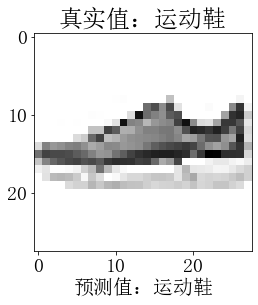

In [12]:
plt.rcParams['font.size'] = 20  # 固定字体大小
def check(n):
    predict = classes[np.argmax(model.predict(test)[n])]  # 返回预测值
    plt.imshow(test[n], cmap=plt.cm.binary)
    plt.title('真实值：' + classes[test_y[n]])
    plt.xlabel('预测值：' + predict)
    plt.show()
check(9)

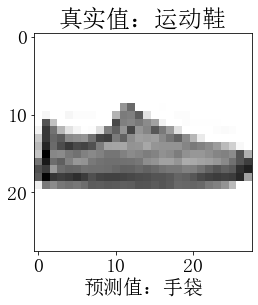

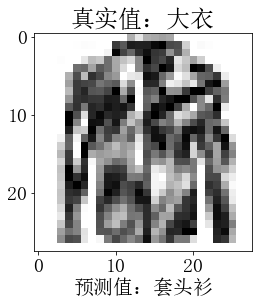

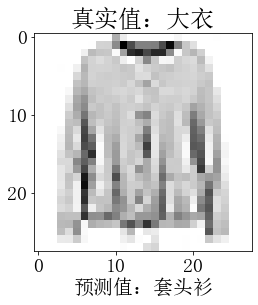

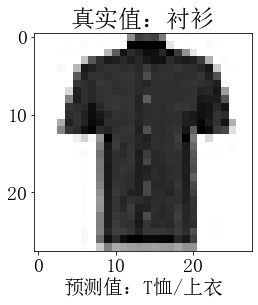

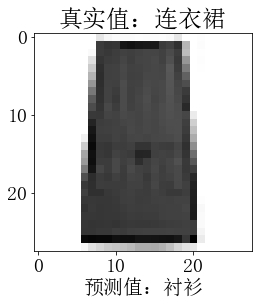

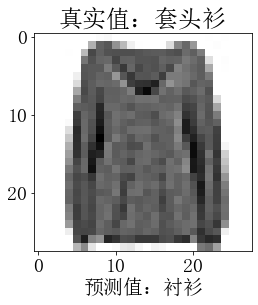

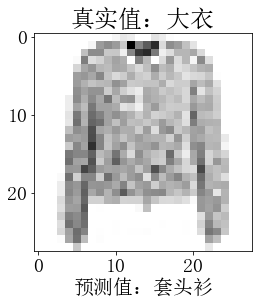

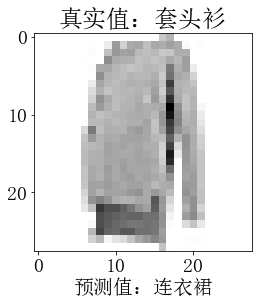

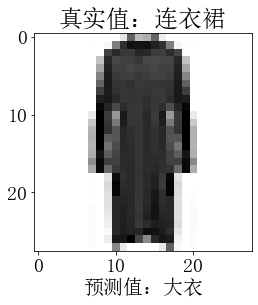

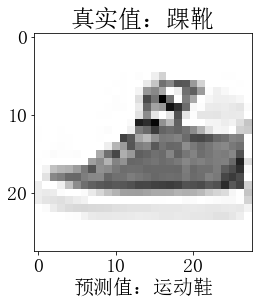

In [14]:
# 输出前10个错误预测结果
cnt = 10
result = model.predict(test)
for i in range(test.shape[0]):
    predict = np.argmax(result[i])
    if predict != test_y[i]:
        check(i)
        cnt -= 1
    if cnt == 0:
        break